In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("D://DS//diabetes_prediction_dataset.csv")

df["#patient"]=range(1,len(df)+1)
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,#patient
0,Female,80.0,0,1,never,25.19,6.6,140,0,1
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,2
2,Male,28.0,0,0,never,27.32,5.7,158,0,3
3,Female,36.0,0,0,current,23.45,5.0,155,0,4
4,Male,76.0,1,1,current,20.14,4.8,155,0,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
 9   #patient             100000 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 7.6+ MB


In [5]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
#patient               0
dtype: int64

In [6]:
heart_disease=df.groupby("heart_disease")
hypertension=df.groupby("hypertension")

In [7]:
diabetes=df.groupby("diabetes")
patients=diabetes.get_group(1)

<Axes: xlabel='hypertension', ylabel='count'>

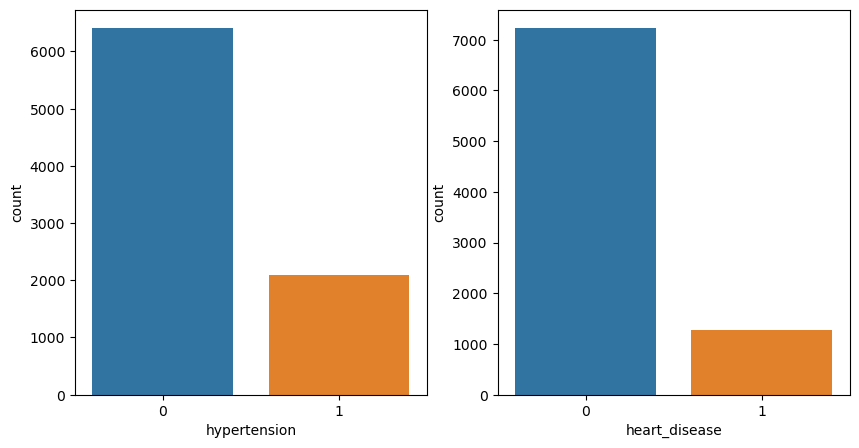

In [8]:
fig,axes=plt.subplots(1,2,figsize=(10,5))

sns.countplot(x="heart_disease",data=patients,ax=axes[1])
sns.countplot(x="hypertension",data=patients,ax=axes[0])


In [9]:
df["smoking_history"].nunique()

6

<Axes: xlabel='smoking_history', ylabel='count'>

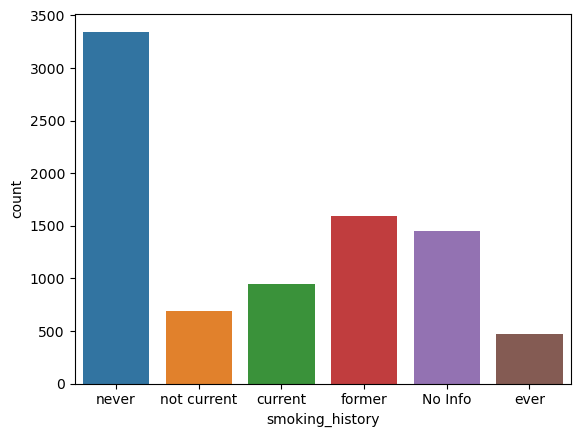

In [10]:
sns.countplot(x="smoking_history",data=patients)

<Axes: xlabel='age', ylabel='Count'>

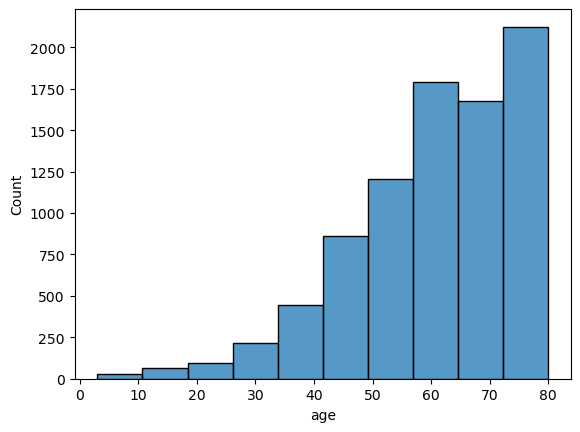

In [11]:
sns.histplot(x="age",data=patients,bins=10)

<Axes: xlabel='bmi', ylabel='Count'>

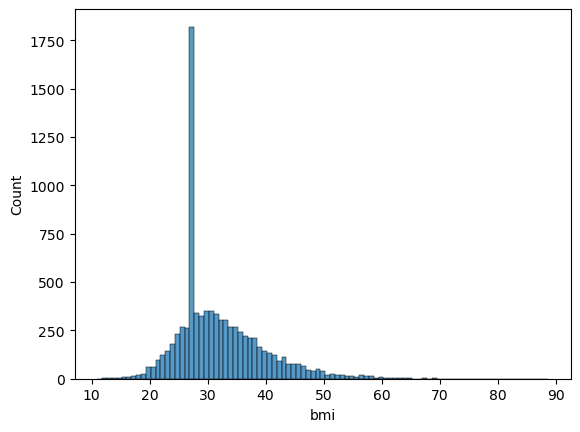

In [12]:
sns.histplot(x=patients.bmi)

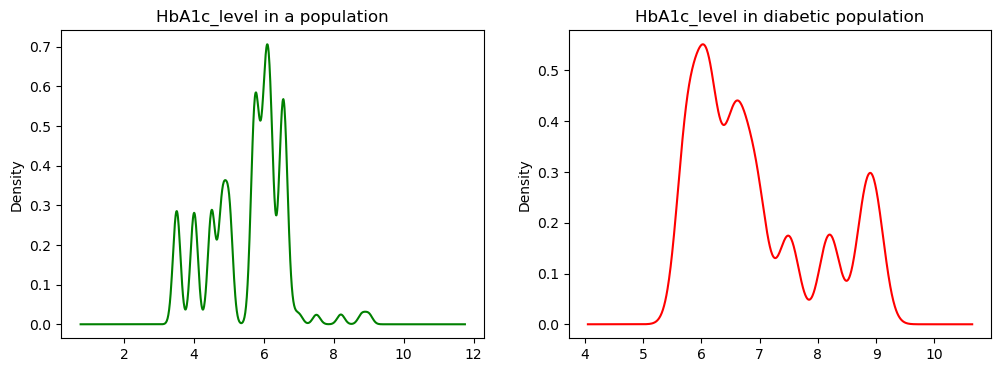

In [13]:
figure,ax=plt.subplots(1,2,figsize=(12,4))

ax[0]=df["HbA1c_level"].plot(kind="density",title="HbA1c_level in a population",ax=ax[0],color="green")
ax[1]=patients["HbA1c_level"].plot(kind="density",title="HbA1c_level in diabetic population",ax=ax[1],color="red")

figure.show()

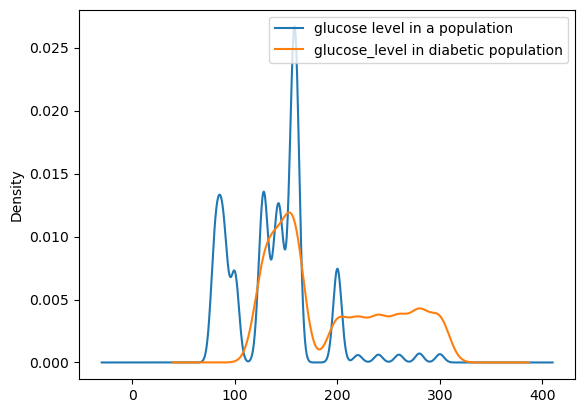

In [14]:
df["blood_glucose_level"].plot(kind="density",label="glucose level in a population")
patients["blood_glucose_level"].plot(kind="density",label="glucose_level in diabetic population")

plt.legend()

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [16]:
for col in df:
    if df[col].dtype=="object":
        df[col]=le.fit_transform(df[col])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int32  
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  int32  
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
 9   #patient             100000 non-null  int64  
dtypes: float64(3), int32(2), int64(5)
memory usage: 6.9 MB


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [19]:
x=df.drop(["diabetes","#patient"],axis=1)

In [20]:
target=df.diabetes

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,target,test_size=0.2)
print(f"x_train:{x_train.shape}")
print(f"x_test:{(x_test.shape)}")
print(f"y_train:{(y_train.shape)}")
print(f"y_test:{y_test.shape}")

x_train:(80000, 8)
x_test:(20000, 8)
y_train:(80000,)
y_test:(20000,)


In [22]:
lr=LogisticRegression()

lr_model=lr.fit(x_train,y_train)


In [23]:
lr_pred=lr_model.predict(x_test)

In [24]:
from sklearn import metrics
print(f"train_Accuracy:{metrics.accuracy_score(y_train,lr.predict(x_train))}")
print(f"test_Accuracy:{metrics.accuracy_score(y_test,lr_pred)}")

train_Accuracy:0.9590125
test_Accuracy:0.9593


In [25]:
metrics.confusion_matrix(lr_pred,y_test)

array([[18160,   657],
       [  157,  1026]], dtype=int64)

In [26]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [27]:
rfc_pred=rfc.predict(x_test)


In [28]:
print(f"train_Accuracy:{metrics.accuracy_score(y_train,rfc.predict(x_train))}")
print(f"test_Accuracy:{metrics.accuracy_score(y_test,rfc_pred)}")

train_Accuracy:0.999175
test_Accuracy:0.9695


In [29]:
metrics.confusion_matrix(rfc_pred,y_test)

array([[18248,   541],
       [   69,  1142]], dtype=int64)